In [5]:
from fastai.vision.all import *
import csv
import glob
from collections import namedtuple
from pathlib import Path

/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
csv_path = 'A/A/train-hackeps_a2.csv'
a2_path = Path('A/A/A2')
path = a2_path

In [7]:
a2_attr = 'id1 id2 name path holes verticals horizontals others oil fringe'
A2Row = namedtuple('A2Row', a2_attr)

In [8]:
rows = []
path_to_tp = {}
train_images = []

with open(csv_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:

        print(row)
        row = A2Row(*row)
        pname = Path(row.path).name
        assert pname not in path_to_tp
        path_to_tp[pname] = row
        rows.append(row)
        train_images.append(Path(row.path))


['736', '37', 'c1r1e2n50', 'A/A/A2/c1/r1/images/e2/c1r1e2n50.tif', '0', '0', '0', '0', '1', '0']
['535', '36', 'c2r3e1n16', 'A/A/A2/c2/r3/images/e1/c2r3e1n16.tif', '1', '0', '0', '0', '0', '0']
['607', '8', 'c2r2e3n3', 'A/A/A2/c2/r2/images/e3/c2r2e3n3.tif', '0', '1', '1', '0', '0', '0']
['1', '1', 'c2r3e0n9', 'A/A/A2/c2/r3/images/e0/c2r3e0n9.tif', '0', '0', '0', '1', '0', '0']
['588', '39', 'c1r3e1n36', 'A/A/A2/c1/r3/images/e1/c1r3e1n36.tif', '1', '0', '0', '0', '0', '0']
['674', '25', 'c1r1e3n12', 'A/A/A2/c1/r1/images/e3/c1r1e3n12.tif', '1', '1', '0', '0', '0', '0']
['168', '20', 'c1r1e0n50', 'A/A/A2/c1/r1/images/e0/c1r1e0n50.tif', '0', '0', '0', '0', '0', '0']
['103', '4', 'c1r1e1n36', 'A/A/A2/c1/r1/images/e1/c1r1e1n36.tif', '1', '0', '0', '0', '0', '0']
['173', '25', 'c1r1e0n48', 'A/A/A2/c1/r1/images/e0/c1r1e0n48.tif', '0', '0', '0', '0', '0', '0']
['155', '6', 'c1r1e0n23', 'A/A/A2/c1/r1/images/e0/c1r1e0n23.tif', '0', '0', '0', '0', '0', '0']
['441', '42', 'c2r2e1n40', 'A/A/A2/c2/r2

In [9]:

def hole_label(f):
    return path_to_tp[f].holes

def vertical_label(f):
    return path_to_tp[f].verticals

def horizontal_label(f):
    return path_to_tp[f].horizontals

def other_label(f):
    return path_to_tp[f].others

def oil_label(f):
    return path_to_tp[f].oil

def fringe_label(f):
    return path_to_tp[f].fringe


In [10]:

def plot_metrics(filename, self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.savefig(f'{filename}.png')

In [11]:

train_tp = [
    ('holes', hole_label),
    ('verticals', vertical_label),
    ('horizontals', horizontal_label),
    ('others', other_label),
    ('oil', oil_label),
    ('fringe', fringe_label),
]

In [12]:
def train(name, label_fn):
    print('Training', name)
    dls = ImageDataLoaders.from_name_func(path, train_images, label_fn, item_tfms=Resize(224))
    learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy, F1Score(), Recall(), Precision()])
    learn.fine_tune(10)
    plot_metrics(name, learn.recorder)
    learn.show_results()
    learn.export(name)
    return learn

Training holes


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training verticals


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training horizontals


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training others


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training oil


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training fringe


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


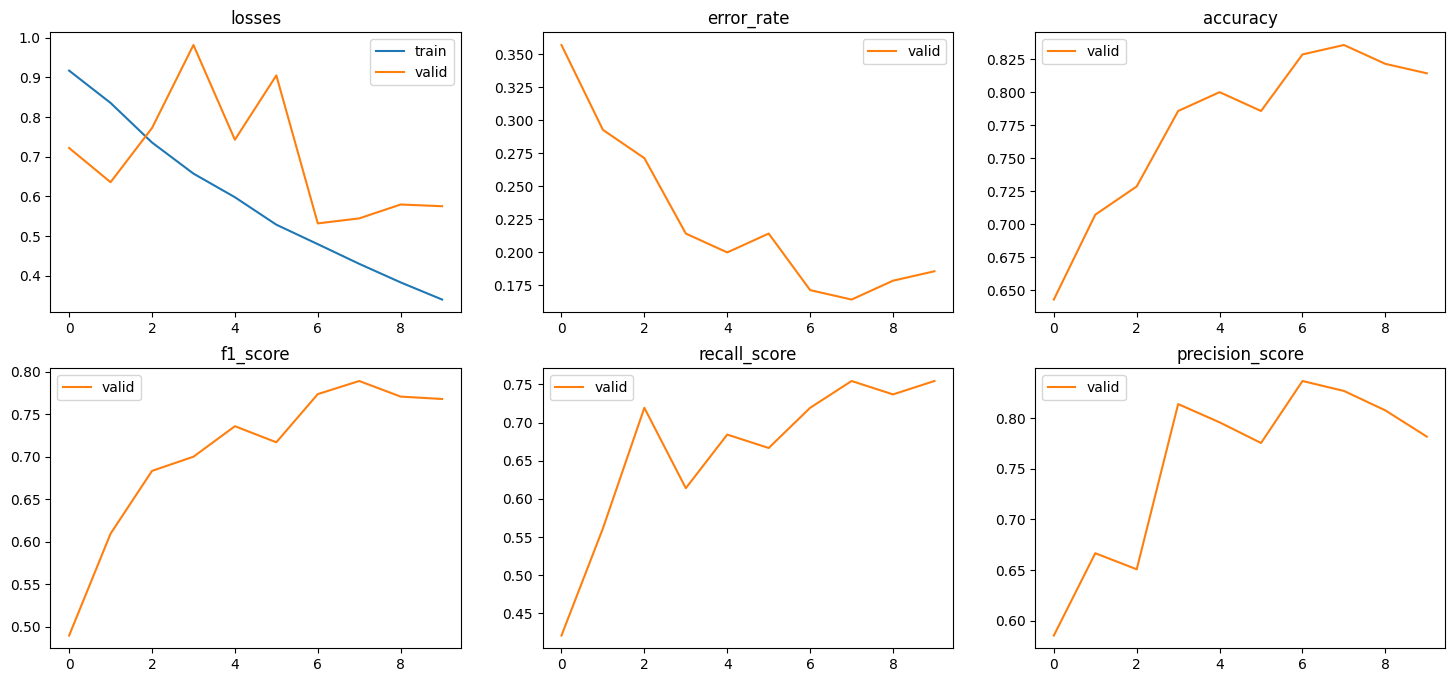

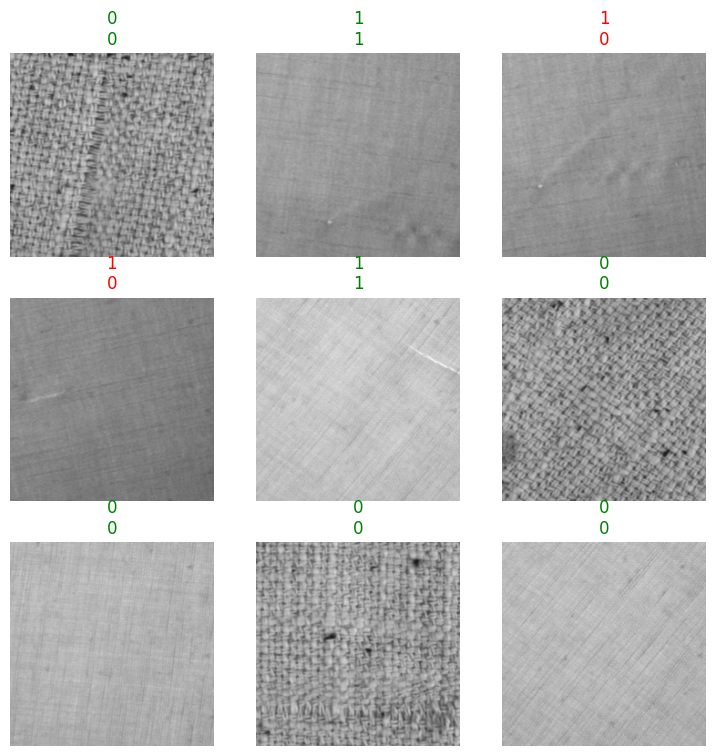

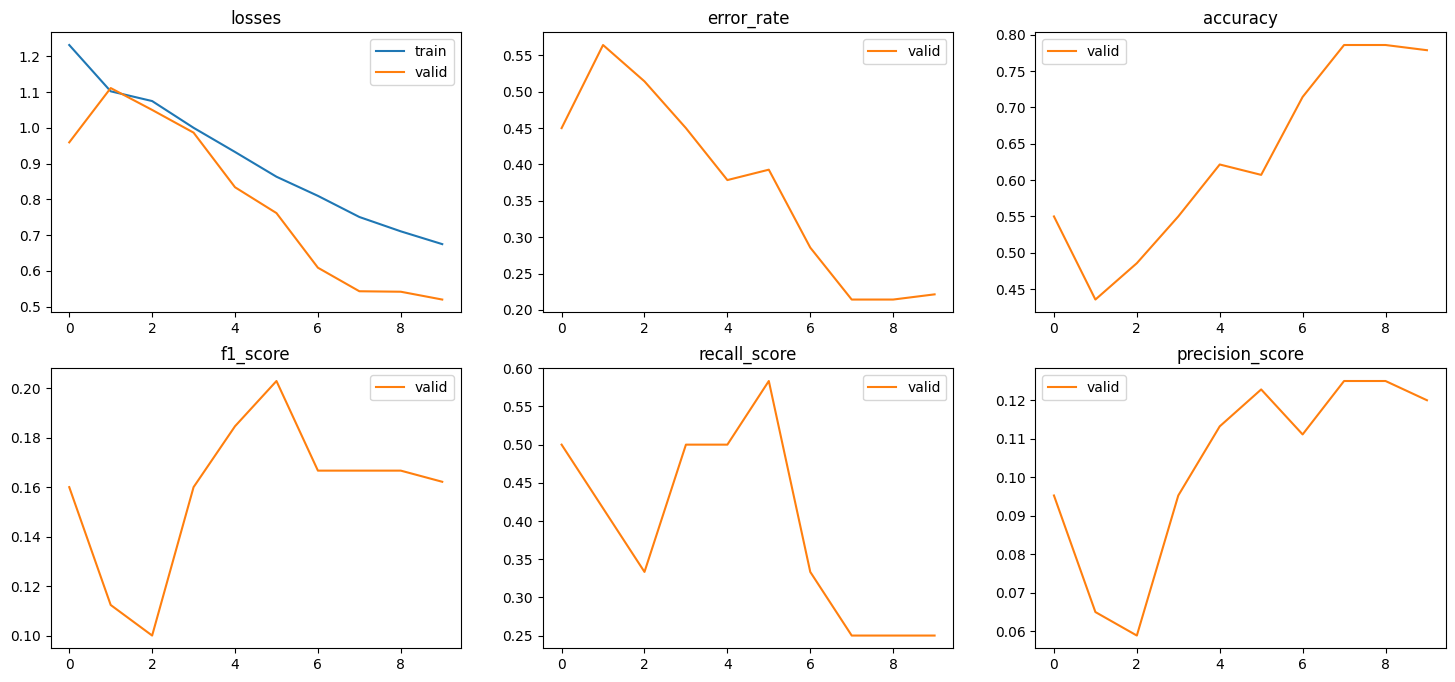

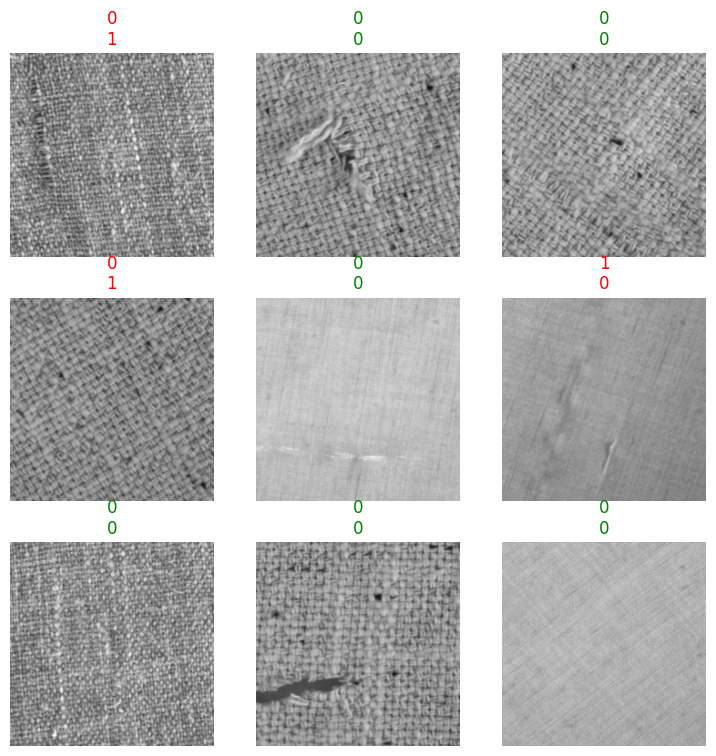

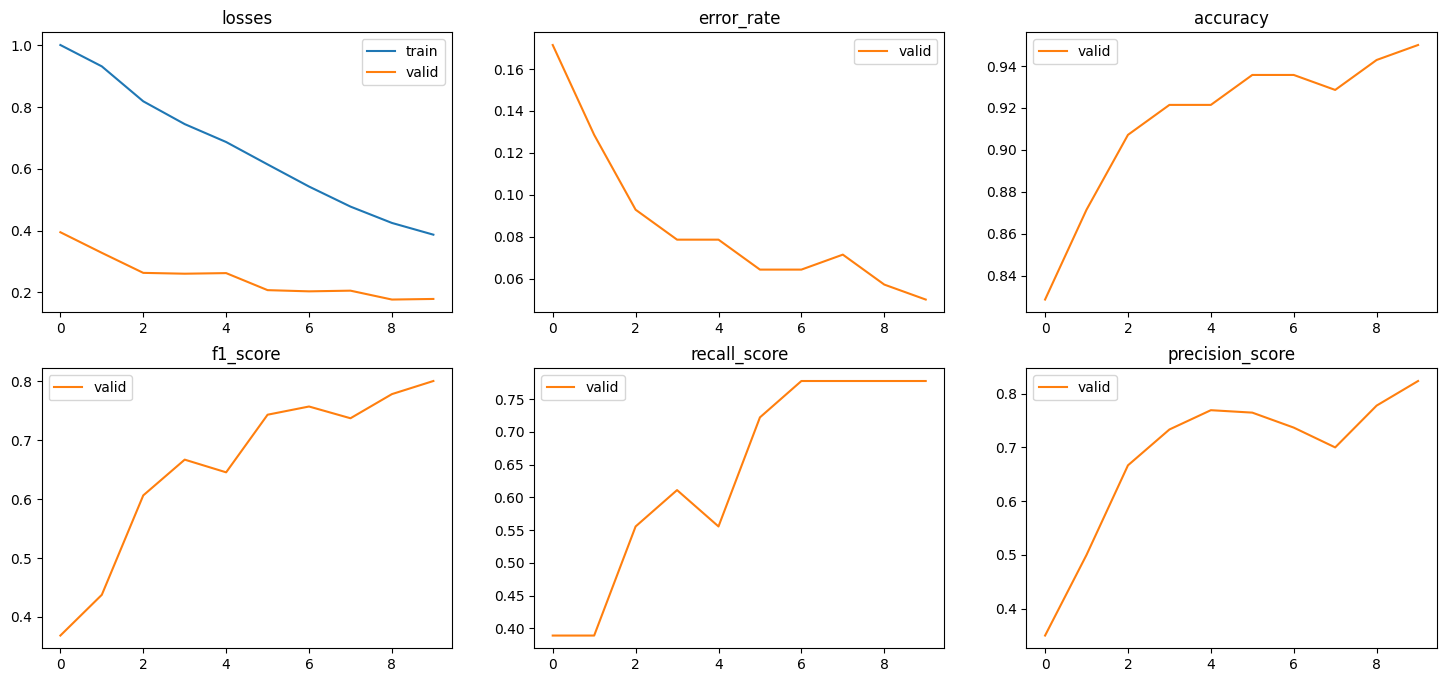

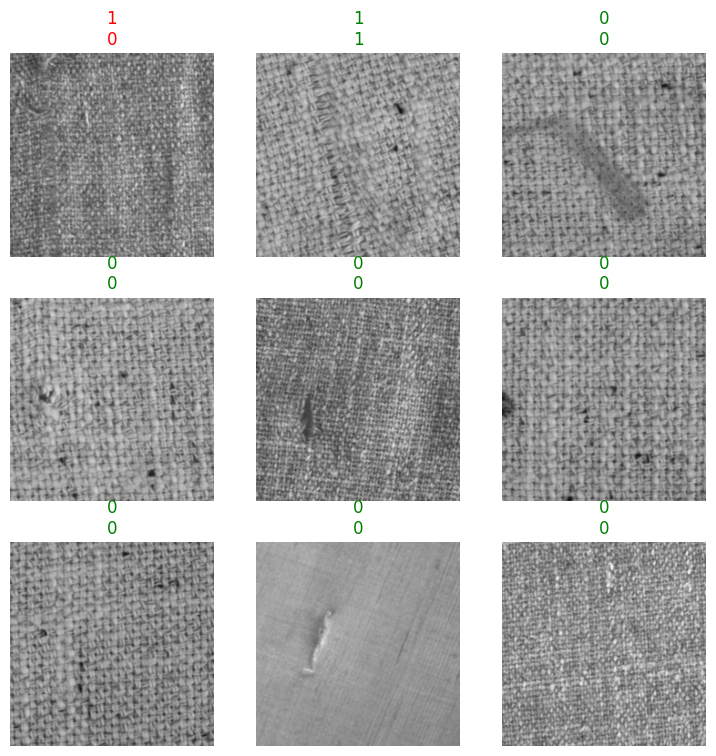

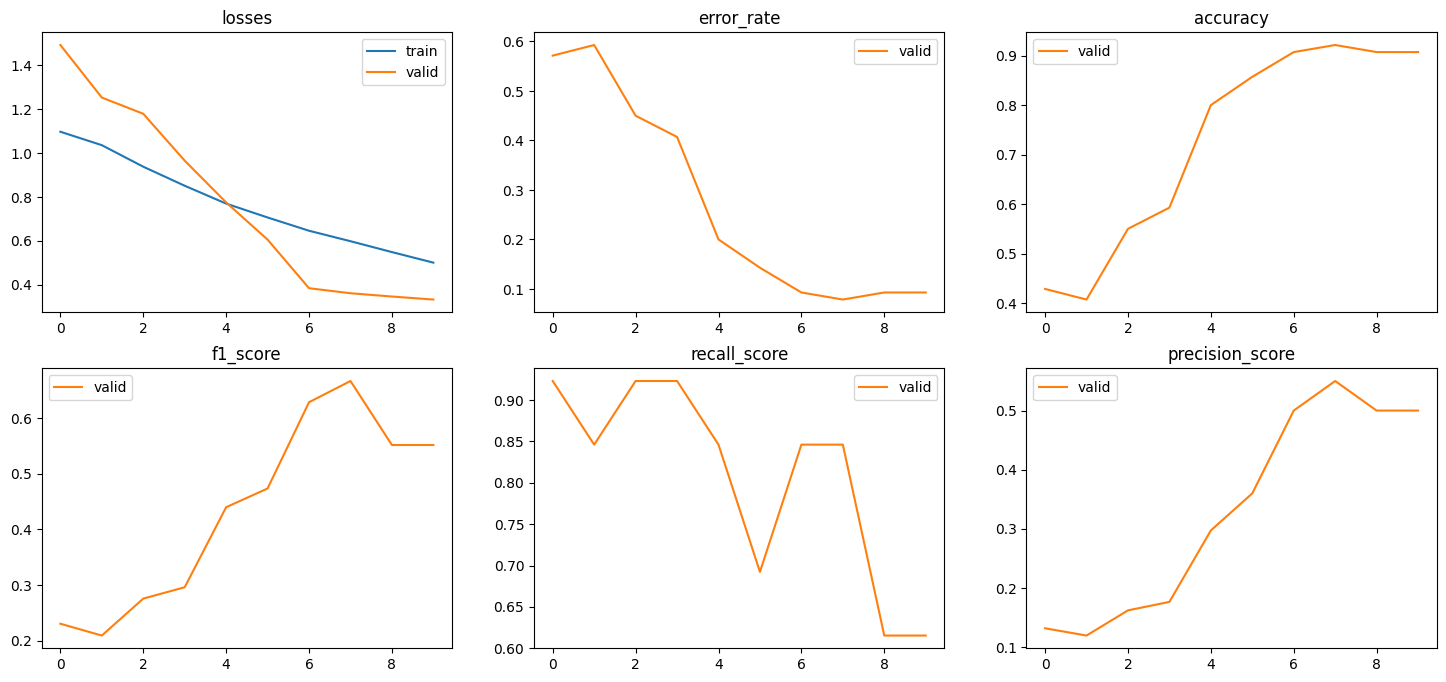

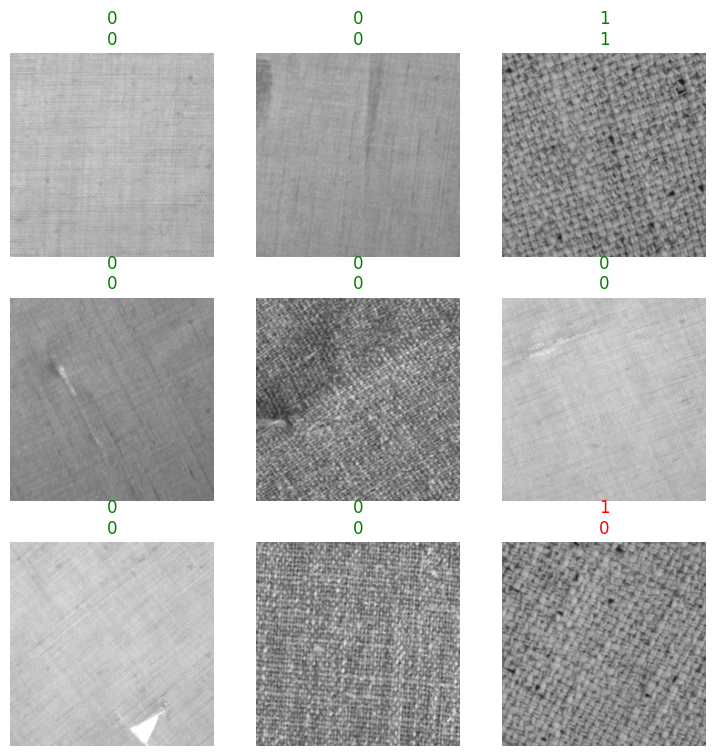

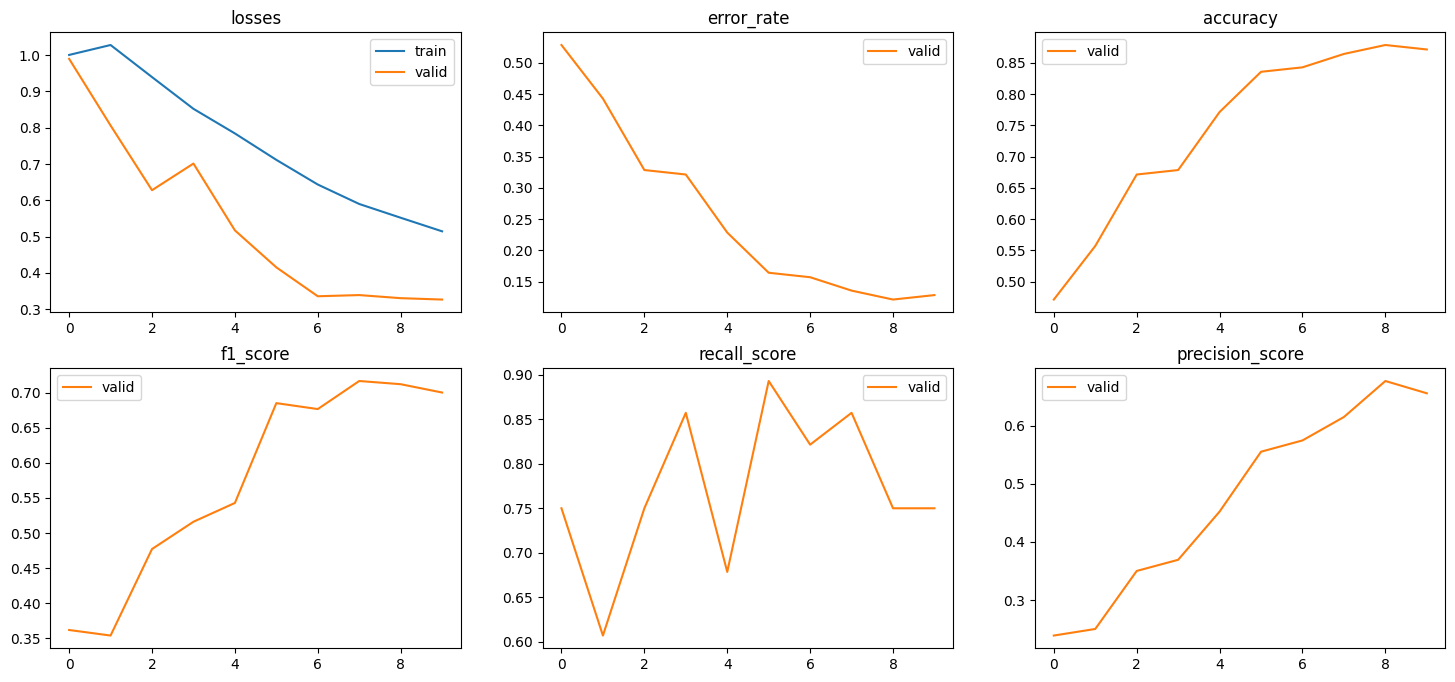

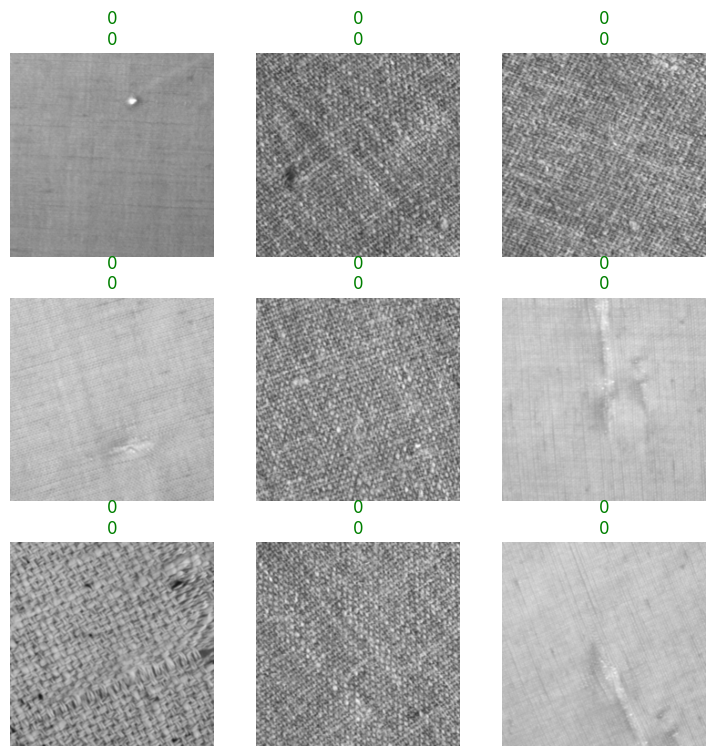

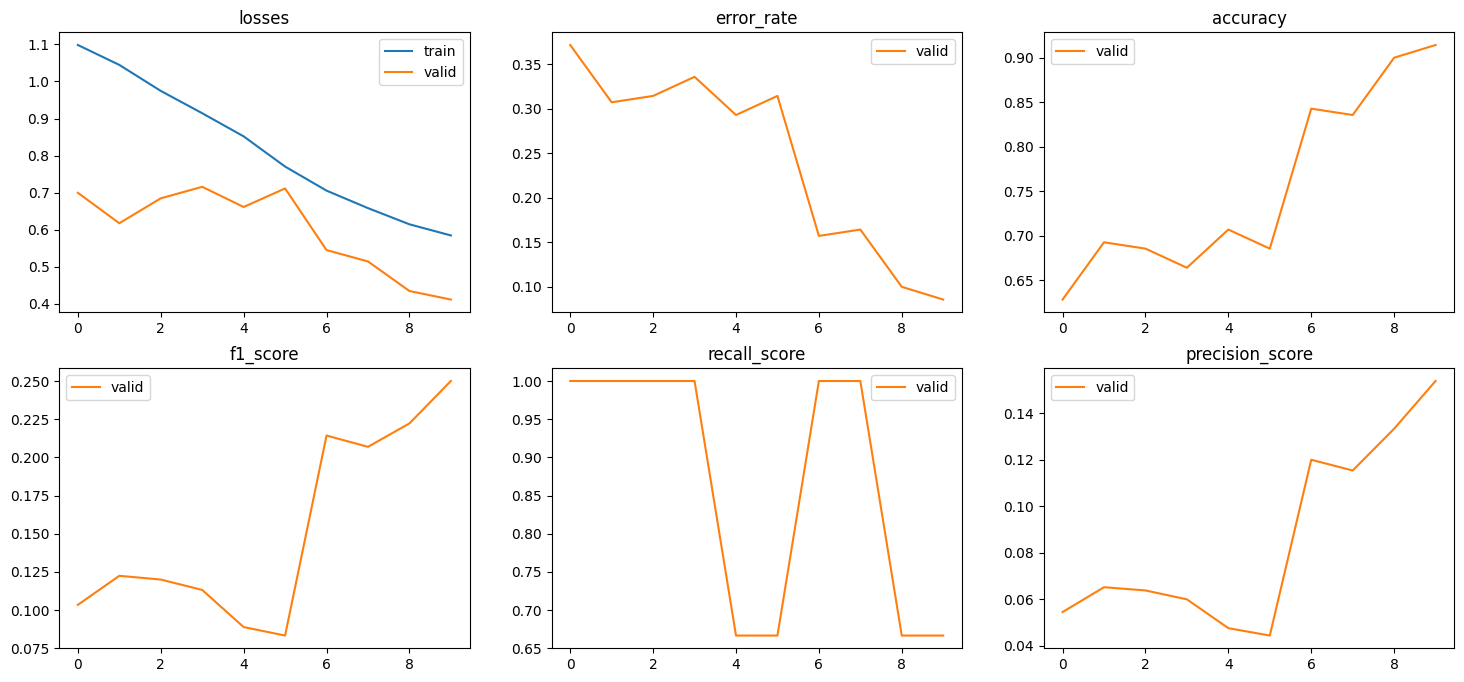

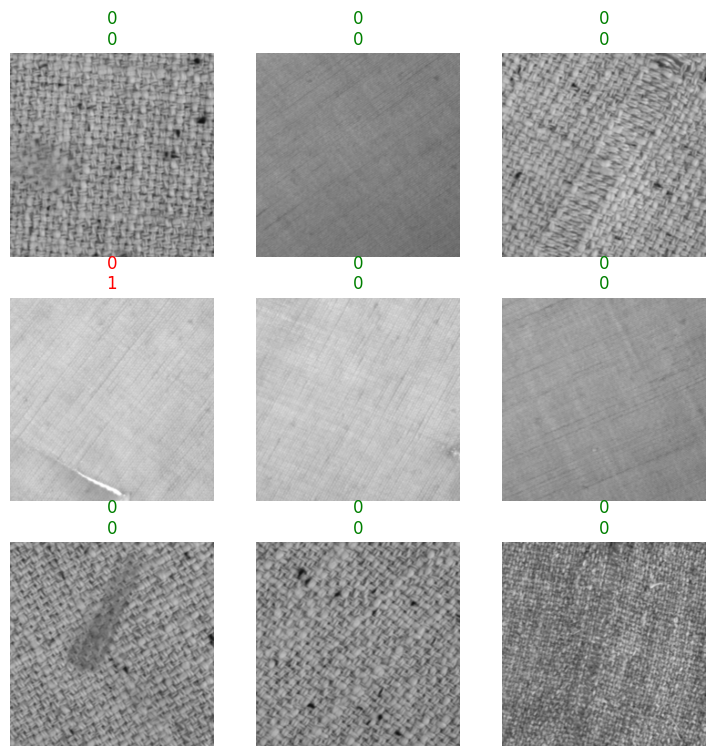

In [13]:
for name, label_fn in train_tp:
    train(name, label_fn)